In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [2]:
# reading the CSV file into pandas dataframe
cred_data = pd.read_csv("german_credit.csv")
cred_data

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
5,0,no checking account,36,existing credits paid back duly till now,(vacation - does not exist?),9055,unknown/ no savings account,1 <= ... < 4 years,2,male : single,...,4,unknown / no property,35,none,for free,1,unskilled - resident,2,"yes, registered under the customers name",yes
6,0,no checking account,24,existing credits paid back duly till now,radio/television,2835,500 <= ... < 1000 DM,.. >= 7 years,3,male : single,...,4,if not A121 : building society savings agreeme...,53,none,own,1,skilled employee / official,1,none,yes
7,0,0 <= ... < 200 DM,36,existing credits paid back duly till now,car (used),6948,... < 100 DM,1 <= ... < 4 years,2,male : single,...,2,"if not A121/A122 : car or other, not in attrib...",35,none,rent,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
8,0,no checking account,12,existing credits paid back duly till now,domestic appliances,3059,.. >= 1000 DM,4 <= ... < 7 years,2,male : divorced/separated,...,4,real estate,61,none,own,1,unskilled - resident,1,none,yes
9,1,0 <= ... < 200 DM,30,critical account/ other credits existing (not ...,car (new),5234,... < 100 DM,unemployed,4,male : married/widowed,...,2,"if not A121/A122 : car or other, not in attrib...",28,none,own,2,management/ self-employed/ highly qualified em...,1,none,yes


In [3]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [4]:
cred_data.dtypes

default                        int64
account_check_status          object
duration_in_month              int64
credit_history                object
purpose                       object
credit_amount                  int64
savings                       object
present_emp_since             object
installment_as_income_perc     int64
personal_status_sex           object
other_debtors                 object
present_res_since              int64
property                      object
age                            int64
other_installment_plans       object
housing                       object
credits_this_bank              int64
job                           object
people_under_maintenance       int64
telephone                     object
foreign_worker                object
dtype: object

In [5]:
cred_data.shape

(1000, 21)

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import zscore

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_curve

In [7]:
X = cred_data.drop("default", axis=1)
y = cred_data["default"]

In [8]:
test_size = 0.50 # taking 50:50 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [9]:
credN_data=X_train
credN_data.shape

(500, 20)

In [10]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [11]:
credN_data=pd.get_dummies(credN_data)

In [12]:
# Print Shape of model data_dat
credN_data.shape

(500, 61)

### Check for highly correlated variables but don't required any treatment for this use case

In [13]:
credN_data.corr().T

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
duration_in_month,1.000000,0.669686,0.061521,0.016471,-0.016886,-0.034892,-0.052569,0.114018,-0.020352,-0.069055,...,-7.916794e-02,-0.066980,0.107500,0.052840,-0.006085,-1.557128e-01,-0.148593,0.148593,-0.122827,0.122827
credit_amount,0.669686,1.000000,-0.254486,-0.024982,0.047257,-0.008663,-0.008651,0.143620,-0.056465,-0.098673,...,-1.172121e-01,-0.045493,0.334242,-0.107587,-0.051660,-1.429619e-01,-0.286036,0.286036,-0.004987,0.004987
installment_as_income_perc,0.061521,-0.254486,1.000000,0.046631,0.005176,0.013426,-0.066527,-0.067434,0.066033,-0.012067,...,2.418437e-02,-0.045652,0.024764,0.047316,-0.043179,-6.166971e-02,0.027533,-0.027533,-0.099614,0.099614
present_res_since,0.016471,-0.024982,0.046631,1.000000,0.298441,0.083938,0.062531,-0.120421,0.099763,-0.016563,...,-2.549124e-01,0.093396,0.056670,-0.068720,-0.033805,4.665443e-02,-0.147116,0.147116,-0.025856,0.025856
age,-0.016886,0.047257,0.005176,0.298441,1.000000,0.144156,0.116705,-0.088513,-0.003051,0.053409,...,2.890115e-03,-0.232857,0.193506,-0.220548,0.092830,5.942677e-02,-0.151331,0.151331,0.009335,-0.009335
credits_this_bank,-0.034892,-0.008663,0.013426,0.083938,0.144156,1.000000,0.090760,-0.134189,-0.008866,-0.101759,...,4.154080e-02,-0.097184,0.018928,0.008244,0.063727,-5.191741e-02,-0.041090,0.041090,-0.024385,0.024385
people_under_maintenance,-0.052569,-0.008651,-0.066527,0.062531,0.116705,0.090760,1.000000,-0.106872,0.076662,-0.028040,...,-2.904670e-02,-0.077498,0.011526,-0.105317,-0.040484,1.331087e-01,-0.005313,0.005313,0.099226,-0.099226
account_check_status_0 <= ... < 200 DM,0.114018,0.143620,-0.067434,-0.120421,-0.088513,-0.134189,-0.106872,1.000000,-0.373070,-0.150809,...,-1.600051e-02,0.017125,0.059625,-0.044042,0.019352,-6.874084e-03,-0.009630,0.009630,-0.054576,0.054576
account_check_status_< 0 DM,-0.020352,-0.056465,0.066033,0.099763,-0.003051,-0.008866,0.076662,-0.373070,1.000000,-0.163512,...,-1.233656e-01,0.096931,-0.046998,-0.006587,0.034859,3.533326e-02,0.112097,-0.112097,0.060026,-0.060026
account_check_status_>= 200 DM / salary assignments for at least 1 year,-0.069055,-0.098673,-0.012067,-0.016563,0.053409,-0.101759,-0.028040,-0.150809,-0.163512,1.000000,...,-3.076607e-02,0.006335,-0.034582,-0.026282,0.062226,3.732031e-02,0.060560,-0.060560,0.000377,-0.000377


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

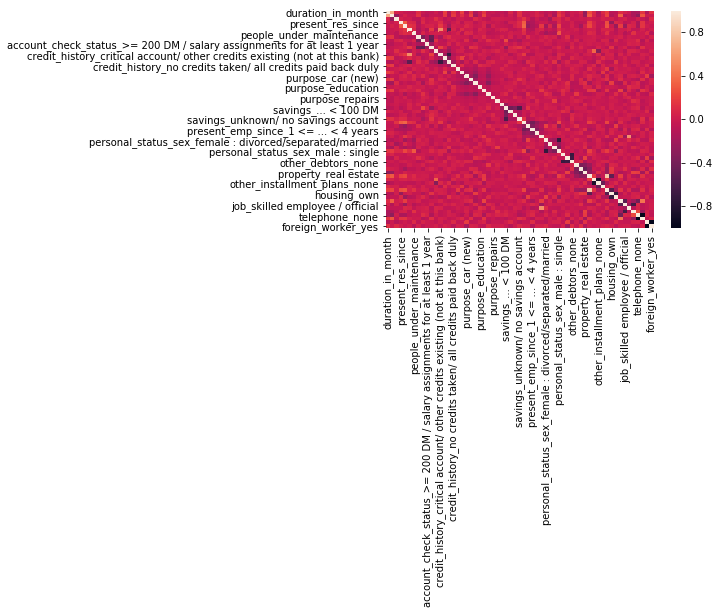

In [15]:
sns.heatmap(credN_data.corr())

# Only "Duration in Month" and "Credit Amount" has higher correlation of 66%

### Drop the original variables which are converted to dummy

In [16]:
credN_data.head(5)

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
262,18,5302,2,4,36,3,1,0,1,0,...,0,0,1,0,0,0,0,1,0,1
457,12,3386,3,4,35,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
82,18,1568,3,4,24,1,1,0,0,0,...,0,1,0,0,0,1,1,0,0,1
563,36,12389,1,4,37,1,1,1,0,0,...,0,0,0,1,0,0,0,1,0,1
407,15,1053,4,2,27,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0


### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [43]:
X = credN_data
y = y.head(500)

In [44]:
X.shape

(500, 61)

In [45]:
y.shape

(500,)

In [46]:
X = X.apply(zscore)  # convert all attributes to Z scale 

In [47]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rfcl = RandomForestClassifier(n_estimators=500,criterion="entropy",random_state=9999,n_jobs=2)

In [50]:
rfcl = rfcl.fit(X_train, y_train)

In [51]:
y_predict = rfcl.predict(X_test)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [52]:

print(metrics.confusion_matrix(y_test, y_predict))

[[108   2]
 [ 38   2]]


In [53]:
accuracy_score=rfcl.score(X_test , y_test)
accuracy_score

0.7333333333333333

### Q6 Show the list of the features importance( 1 Marks)

In [54]:
feature_importances=pd.DataFrame(rfcl.feature_importances_,index=X_train.columns,columns=['importance']).sort_values('importance',ascending=False)

In [55]:
feature_importances

,importance
age,0.097171
credit_amount,0.095900
duration_in_month,0.069566
present_res_since,0.038111
installment_as_income_perc,0.032596
savings_... < 100 DM,0.024675
credits_this_bank,0.024305
purpose_domestic appliances,0.020916
credit_history_existing credits paid back duly till now,0.019104
job_skilled employee / official,0.017834


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [96]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [97]:
# Use below values
num_folds = 10
seed = 77

In [98]:
#Validate the Random Forest model build above using k fold

In [99]:
scores = cross_val_score(rfcl,X, y, cv=num_folds, scoring = 'accuracy')
scores 

array([0.7254902 , 0.7254902 , 0.78431373, 0.68627451, 0.7       ,
       0.72      , 0.71428571, 0.71428571, 0.71428571, 0.71428571])

In [100]:
#Calculate Mean score

In [101]:
mean_score=scores.mean()
mean_score

0.7198711484593838

In [102]:
# Calculate score standard deviation using std()

In [103]:
std_score=scores.std()
std_score

0.024216512339839714

# Q8 Print the confusion matrix( 1 Marks)

In [104]:
from sklearn.model_selection import cross_val_predict

In [105]:
y_pred=cross_val_predict(rfcl,X, y, cv=num_folds)

In [107]:
print(metrics.confusion_matrix(y, y_pred))

[[355   9]
 [131   5]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [76]:
trainRecall = recall_score(y_test, y_predict, average="weighted")
trainPrecision = precision_score(y_test, y_predict, average="weighted")
trainF1score = f1_score(y_test, y_predict , average="weighted")

In [77]:
trainRecall

0.7333333333333333

In [78]:
trainPrecision

0.6757990867579908

In [79]:
trainF1score

0.6429924242424243

# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [29]:
#Hint: Use roc_curve

In [80]:
from sklearn.metrics import roc_curve, auc

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

In [84]:
y_predictProb = rfcl.predict_proba(X_test)

In [86]:
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[:,1])

In [87]:
roc_auc = auc(fpr, tpr)
roc_auc

0.4863636363636364

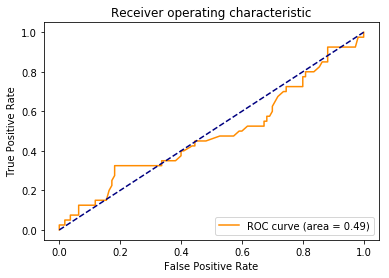

In [88]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [108]:
 from sklearn.metrics import roc_auc_score

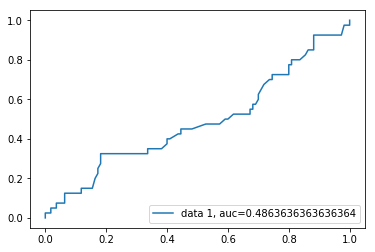

In [110]:
y_pred_proba = rfcl.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [112]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [113]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfcl.fit(X_, y_)
    y_pred = rfcl.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [114]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.722
Standard deviation:  0.019333333333333327
